In [1]:
import pandas as pd

In [2]:
# Load dc-crime data
df = pd.read_csv('F:\Data Science\Data Visualization\DATS 6401 - Final Project\Data\dc_crime_clean.csv', 
                 low_memory=False)

# Learn more about data
print(df.head())
print(df.columns)
print(df.shape) # dimension

        CCN       REPORT_DAT     SHIFT  METHOD    OFFENSE  WARD  DISTRICT  \
0  10039616  3/27/2010 13:00       DAY  OTHERS  SEX ABUSE     2         2   
1  10076959    6/4/2010 0:15  MIDNIGHT   KNIFE  SEX ABUSE     4         4   
2  10076959    6/4/2010 0:15  MIDNIGHT   KNIFE  SEX ABUSE     4         4   
3  10131474  9/10/2010 19:00   EVENING  OTHERS  SEX ABUSE     7         1   
4  10131474  9/10/2010 19:00   EVENING  OTHERS  SEX ABUSE     7         1   

   PSA NEIGHBORHOOD_CLUSTER   LATITUDE  LONGITUDE  Year  Month  Day  
0  206            Cluster 4  38.907668 -77.071609  2010      3   27  
1  403           Cluster 18  38.956405 -77.021102  2010      6    4  
2  403           Cluster 18  38.956405 -77.021102  2010      6    4  
3  107           Cluster 26  38.884077 -76.976246  2010      9   10  
4  107           Cluster 26  38.884077 -76.976246  2010      9   10  
Index(['CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'WARD', 'DISTRICT',
       'PSA', 'NEIGHBORHOOD_CLUSTER', '

In [3]:
# Get the target vector
y = df['OFFENSE']

# Get the feature vector
X = df[['SHIFT' ,'METHOD', 'DISTRICT', 'WARD', 'PSA', 'NEIGHBORHOOD_CLUSTER', 'Year', 'Month', 'Day']]

In [4]:
# Encode the features using one-hot-encoding
X = pd.get_dummies(X)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Declare the LabelEncoder
class_le = LabelEncoder()

# Enclode the target
y = class_le.fit_transform(y)

In [6]:
from sklearn.metrics import precision_recall_fscore_support

def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    clf = classifier(random_state=0)
    
    # Train the model
    clf.fit(X, y)
    
    if classifier is DecisionTreeClassifier:
        global tree  
        # Get the tree
        tree = clf
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        importances = clf.feature_importances_
    

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# The list of classifiers
clfs = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

# The tree
tree = None

# The list of importances
importances = []

# For each classifer
for classifier in clfs:
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(classifier)

E:\Programming\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Programming\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Programming\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


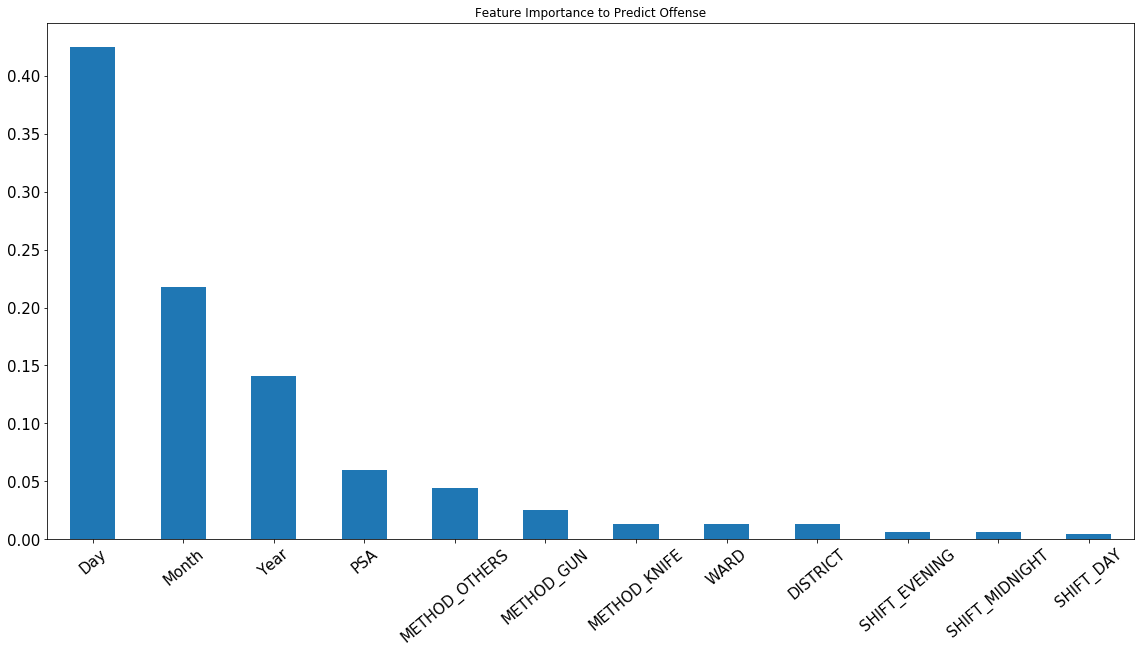

In [8]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False).head(12)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=40, fontsize=15)

# Show the plot
plt.tight_layout()
plt.title("Feature Importance to Predict Offense")
plt.show()